# 1857. Largest Color Value in a Directed Graph

There is a directed graph of n colored nodes and m edges. The nodes are numbered from 0 to n - 1.

You are given a string colors where colors[i] is a lowercase English letter representing the color of the ith node in this graph (0-indexed). You are also given a 2D array edges where edges[j] = [aj, bj] indicates that there is a directed edge from node aj to node bj.

A valid path in the graph is a sequence of nodes x1 -> x2 -> x3 -> ... -> xk such that there is a directed edge from xi to xi+1 for every 1 <= i < k. The color value of the path is the number of nodes that are colored the most frequently occurring color along that path.

Return the largest color value of any valid path in the given graph, or -1 if the graph contains a cycle.

 

Example 1:

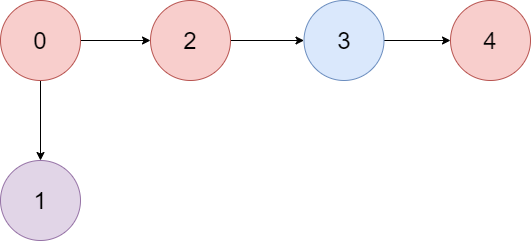


Input: colors = "abaca", edges = [[0,1],[0,2],[2,3],[3,4]]
Output: 3
Explanation: The path 0 -> 2 -> 3 -> 4 contains 3 nodes that are colored "a" (red in the above image).

Example 2:

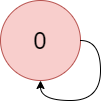


Input: colors = "a", edges = [[0,0]]
Output: -1
Explanation: There is a cycle from 0 to 0.
 

Constraints:

n == colors.length
m == edges.length
1 <= n <= 105
0 <= m <= 105
colors consists of lowercase English letters.
0 <= aj, bj < n

## Solution: DFS to track max count of each colour in all paths that are starting at each cell

In [14]:
colors = "abaca"; edges = [[0,1],[0,2],[2,3],[3,4]]
from collections import defaultdict
INF= float('inf')
n=len(colors)
#Create adjacency list
adj = defaultdict(list)
for u,v in edges:
    adj[u].append(v)
adj

defaultdict(list, {0: [1, 2], 2: [3], 3: [4]})

In [18]:
#Defining color count tracking
count=[[0]*26 for _ in range(n)]
vis=[0]*n
#DFS
def dfs(node):
    if vis[node]==1: #Cycle detected
        return INF
    if vis[node]==2: #Already visited
        return count[node][ord(colors[node])-ord('a')]
    #mark visiting
    vis[node]=1
    for nxt in adj[node]:
        res=dfs(nxt)
        if res==INF:
            return INF
        #Update colour count of path starting from that node
        for c in range(26):
            count[node][c]=max(count[node][c],count[nxt][c])
    #Update color count of that node
    col=ord(colors[node])-ord('a')
    count[node][col]+=1
    vis[node]=2 #mark visited

    return count[node][col]


In [19]:
sol=0
for i in range(n):
    if dfs(i)==INF:
        sol= -1 #Graph contains a cycle
        break
    sol=max(sol,dfs(i))
sol

3

## Final Solution

In [20]:
colors = "abaca"; edges = [[0,1],[0,2],[2,3],[3,4]]
from collections import defaultdict
INF= float('inf')
n=len(colors)
#Create adjacency list
adj = defaultdict(list)
for u,v in edges:
    adj[u].append(v)
adj


#Defining color count tracking
count=[[0]*26 for _ in range(n)]
vis=[0]*n
#DFS
def dfs(node):
    if vis[node]==1: #Cycle detected
        return INF
    if vis[node]==2: #Already visited
        return count[node][ord(colors[node])-ord('a')]
    #mark visiting
    vis[node]=1
    for nxt in adj[node]:
        res=dfs(nxt)
        if res==INF:
            return INF
        #Update colour count of path starting from that node
        for c in range(26):
            count[node][c]=max(count[node][c],count[nxt][c])
    #Update color count of that node
    col=ord(colors[node])-ord('a')
    count[node][col]+=1
    vis[node]=2 #mark visited

    return count[node][col]

sol=0
for i in range(n):
    if dfs(i)==INF:
        sol= -1 #Graph contains a cycle
        break
    sol=max(sol,dfs(i))
sol


3